In [1]:
# Decision Tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df['Gender'][df['Gender']=="Male"] = 0
df['Gender'][df['Gender']=="Female"] = 1
df
cols = ['User ID', 'Gender', 'Age', 'EstimatedSalary']

C:\Users\HP\AppData\Local\Temp\ipykernel_19944\2016151685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][df['Gender']=="Male"] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_19944\2016151685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][df['Gender']=="Female"] = 1


In [4]:
x = df[cols]
y = df.Purchased
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000
...,...,...,...,...
395,15691863,1,46,41000
396,15706071,0,51,23000
397,15654296,1,50,20000
398,15755018,0,36,33000


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4375, 0.9583333333333334, 'x[2] <= 44.5\ngini = 0.464\nsamples = 320\nvalue = [203, 117]'),
 Text(0.2054794520547945, 0.875, 'x[3] <= 89500.0\ngini = 0.274\nsamples = 226\nvalue = [189, 37]'),
 Text(0.0821917808219178, 0.7916666666666666, 'x[2] <= 36.5\ngini = 0.062\nsamples = 187\nvalue = [181, 6]'),
 Text(0.0547945205479452, 0.7083333333333334, 'gini = 0.0\nsamples = 123\nvalue = [123, 0]'),
 Text(0.1095890410958904, 0.7083333333333334, 'x[0] <= 15578509.0\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.0547945205479452, 0.625, 'x[3] <= 58000.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0273972602739726, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0821917808219178, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1643835616438356, 0.625, 'x[3] <= 74500.0\ngini = 0.123\nsamples = 61\nvalue = [57, 4]'),
 Text(0.136986301369863, 0.5416666666666666, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.191780821

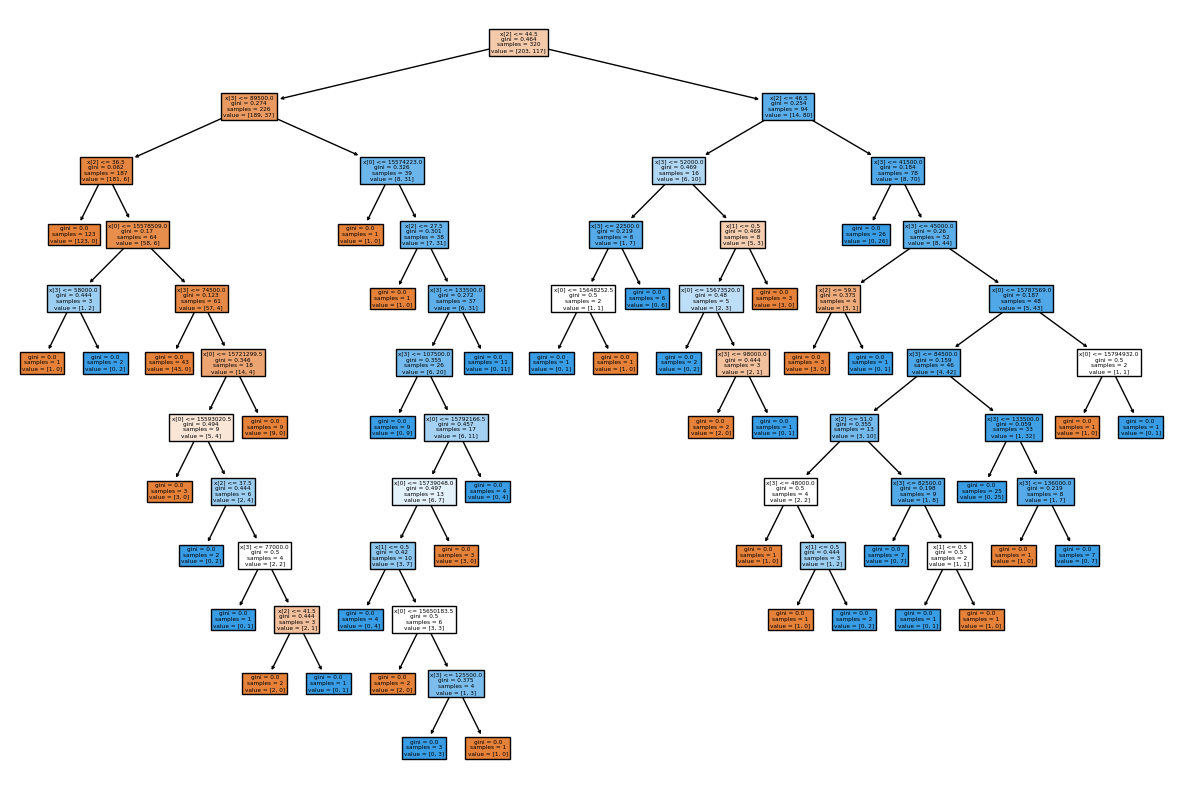

In [8]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [9]:
y_pred = clf.predict(x_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[53,  1],
       [ 7, 19]], dtype=int64)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        54
           1       0.95      0.73      0.83        26

    accuracy                           0.90        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.90      0.90      0.90        80



In [12]:
print(accuracy_score(y_test, y_pred))

0.9
